# Telco Customer Churn

## 1. Import Libraries

We load all the required libraries for reading .csv file, exploratory data analysis, visualization and data modeling in the below cell.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os # manipulate paths
from datetime import date # supplies classes for manipulating dates
from time import strftime # convert time to a string as specified by the format argument

from sklearn.preprocessing import LabelEncoder # encode target labels with value between 0 and n_classes-1.
from sklearn.linear_model import LogisticRegression # logistic regression classifier
from sklearn import ensemble # provides methods for both classification and regression
from sklearn.ensemble import RandomForestClassifier # random forest classifier


from sklearn.metrics import confusion_matrix # compute confusion matrix to evaluate the accuracy of a classification
from sklearn.metrics import roc_curve # compute receiver operating characteristic (ROC)
from sklearn.metrics import roc_auc_score # compute area under the receiver operating characteristic curve (ROC AUC) from prediction scores


from sklearn.model_selection import train_test_split # this splits data into training and test set

import matplotlib.pyplot as plt # to create visualisations
%matplotlib inline
import seaborn as sns

import warnings # remove warning messages
warnings.filterwarnings('ignore')

## 2. Load and Read the Data

We load the data in a pandas dataframe called df and return the name of each columns.

In [2]:
# input data file is available in the "../input/" directory.
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
# read the data
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# print the columns names for each dataset
print("df columns:",list(df))

df columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


## 3. Basic Date Information

This section will provide basic informtion about the data.

In [5]:
# print the number of rows and columns
print("df shape:",df.shape)

df shape: (7043, 21)


In [6]:
# print the basic information: missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

The data has no missing values.

In [7]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,6784-XYJAE,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [8]:
# print unique values for each columns
print('Values in gender:', df.gender.unique())
print('Values in SeniorCitizen:',df.SeniorCitizen.unique())
print('Values in Partner:',df.Partner.unique())
print('Values in Dependents:',df.Dependents.unique())
print('Values in PhoneService:',df.PhoneService.unique())
print('Values in MultipleLines:',df.MultipleLines.unique())
print('Values in InternetService:',df.InternetService.unique())
print('Values in OnlineSecurity:', df.OnlineSecurity.unique())
print('Values in OnlineBackup:', df.OnlineBackup.unique())
print('Values in DeviceProtection:', df.DeviceProtection.unique())
print('Values in TechSupport:', df.TechSupport.unique())
print('Values in StreamingTV:', df.StreamingTV.unique())
print('Values in StreamingMovies:', df.StreamingMovies.unique())
print('Values in Contract:', df.Contract.unique())
print('Values in PaperlessBilling:', df.PaperlessBilling.unique())
print('Values in PaymentMethod:', df.PaymentMethod.unique())
print('Values in Churn:', df.Churn.unique())

Values in gender: ['Female' 'Male']
Values in SeniorCitizen: [0 1]
Values in Partner: ['Yes' 'No']
Values in Dependents: ['No' 'Yes']
Values in PhoneService: ['No' 'Yes']
Values in MultipleLines: ['No phone service' 'No' 'Yes']
Values in InternetService: ['DSL' 'Fiber optic' 'No']
Values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Values in OnlineBackup: ['Yes' 'No' 'No internet service']
Values in DeviceProtection: ['No' 'Yes' 'No internet service']
Values in TechSupport: ['No' 'Yes' 'No internet service']
Values in StreamingTV: ['No' 'Yes' 'No internet service']
Values in StreamingMovies: ['No' 'Yes' 'No internet service']
Values in Contract: ['Month-to-month' 'One year' 'Two year']
Values in PaperlessBilling: ['Yes' 'No']
Values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Values in Churn: ['No' 'Yes']


In [9]:
# print the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 4. Data Cleansing

* There are 11 samples that have TotalCharges set to " ", which explain the reason why it is set as object. We investigate why these rows have no values and convert the type to numeric (float).

In [10]:
# find the rows in the dataset where there are no input for TotalCharges
total_charges = df[df.TotalCharges == " "]
total_charges.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [11]:
# check that all customers with tenure 0 have TotalCharges set as " "
new_customers = df[df.tenure == 0]
total_charges == new_customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
753,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
936,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1082,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1340,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3331,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3826,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4380,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5218,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6670,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


All of the customers where the dataset has no inputs for TotalCharges are new customers that have not yet transacted with the company but are already subscribed. 

In [12]:
# replace the empthy rows by zero
df.loc[df['TotalCharges'] == " ", 'TotalCharges'] = '0'

# convert TotalCharges to numerical values
df.TotalCharges = pd.to_numeric(df.TotalCharges)

We check that the dataset does not contain any duplicated rows or customer IDs.

In [13]:
# check for duplicated rows
dups = df[df.duplicated() == True].count()

# check for duplicated customers
dups_id = df['customerID'][df['customerID'].duplicated() == True].count()

print('Duplicated rows: ', dups.sum())
print('Duplicated customer ids: ', dups_id)

Duplicated rows:  0
Duplicated customer ids:  0


## 5. Exploratory Data Analysis

#### Overview of the churn

In [14]:
# check the total percentage of no show
pd.DataFrame(df.groupby('Churn')['customerID'].count()).apply(lambda x : x / sum(x) * 100)

,customerID
Churn,
No,73.463013
Yes,26.536987


27% of the customers in our dataset have churned.

### 5.1 Categorical Data

#### Gendre

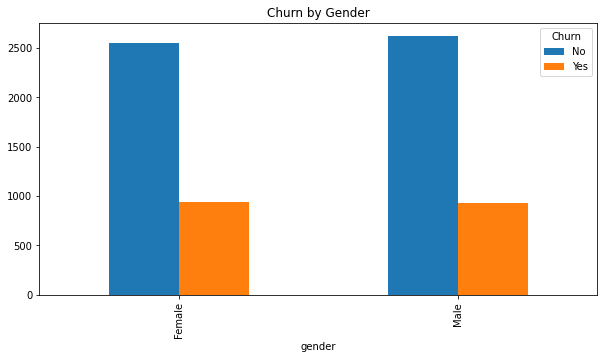

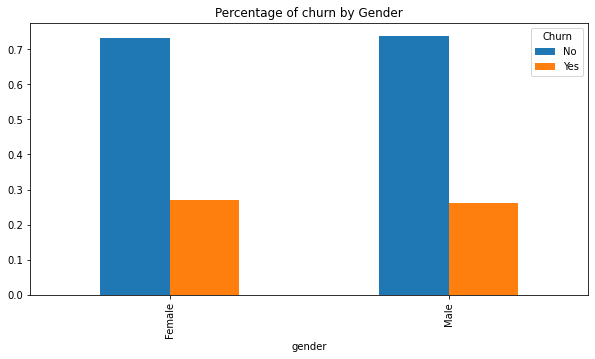

In [15]:
# churn by gender
gender = df.groupby('gender')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
gender.set_title("Churn by Gender")
plt.show()
gender_pct = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
gender_pct.set_title("Percentage of churn by Gender")
plt.show()

The split between male and female is almost excatly 50/50. This feature does not seem to have significance when it comes to predicting the churn.

#### Senior Citizen

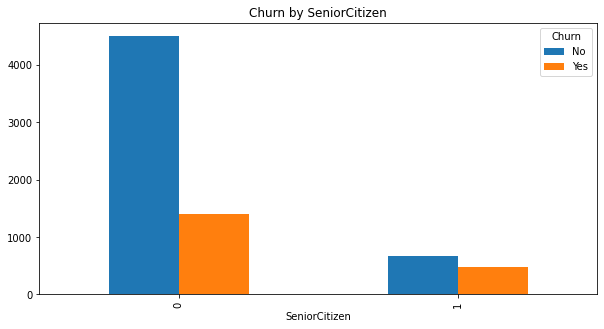

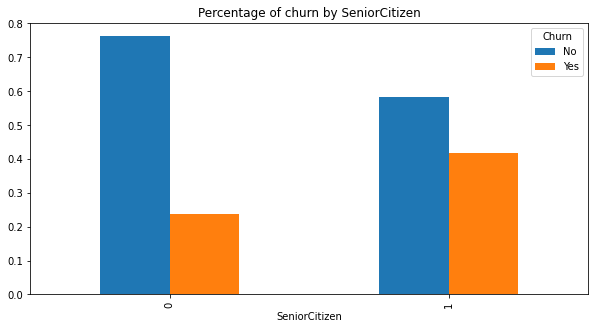

In [16]:
# churn by SeniorCitizen
senior = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
senior.set_title("Churn by SeniorCitizen")
plt.show()
senior_pct = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
senior_pct.set_title("Percentage of churn by SeniorCitizen")
plt.show()

From the 7,043 customers in the dataset, senior citizen are 1,042, which represent 26% of the total customers. However, senior citizen seem more likely to churn as 42% have cancelled their subscription compare with 24% for the non  senior citizen.

#### Partner

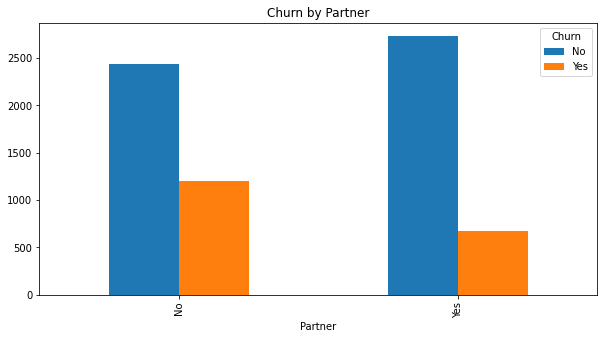

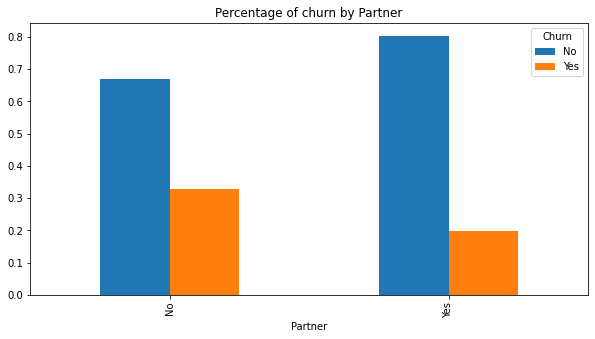

In [17]:
# churn by Partner
partner = df.groupby('Partner')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
partner.set_title("Churn by Partner")
plt.show()
partner_pct = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
partner_pct.set_title("Percentage of churn by Partner")
plt.show()

There are roughly the same number of customers single and with partner. However, there is a noticeable difference in the churn as 20% of the customers with partners unsubscribe compared with 33% of the single customes.

#### Dependents

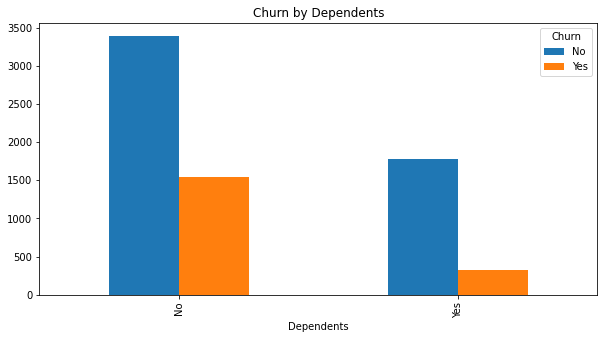

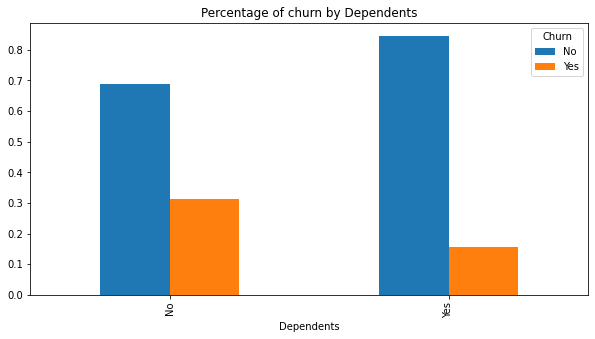

In [18]:
# churn by Partner
dependents = df.groupby('Dependents')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
dependents.set_title("Churn by Dependents")
plt.show()
dependents_pct = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
dependents_pct.set_title("Percentage of churn by Dependents")
plt.show()

30% of the customers in the dataset have dependants, 16% of these customers have churned. This represents almost half of the churn rate of the the customers that do not have dependants (31% churn).

#### Phone Service 

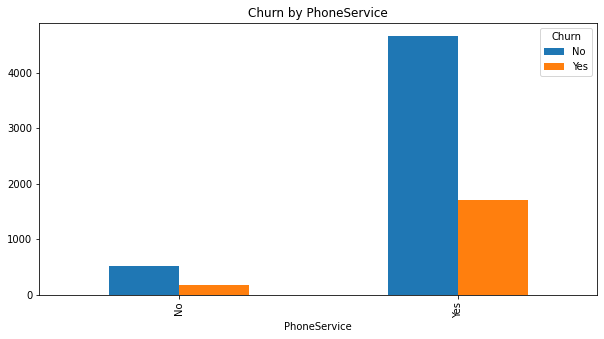

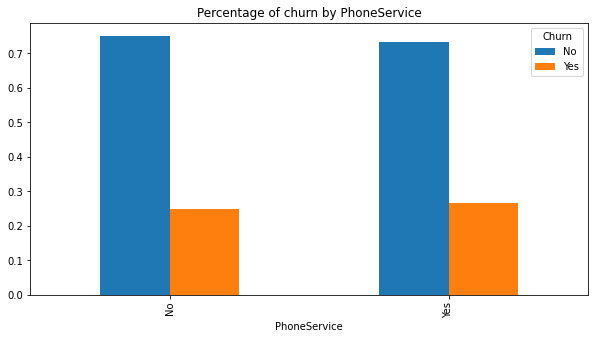

In [19]:
# churn by PhoneService
phservice = df.groupby('PhoneService')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
phservice.set_title("Churn by PhoneService")
plt.show()
phservice_pct = df.groupby('PhoneService')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
phservice_pct.set_title("Percentage of churn by PhoneService")
plt.show()

The customers subscribed to the phone service represents 90% of the dataset, however when looking at the percentage churn there is no significant differences between the two sets.

#### Multiple Lines

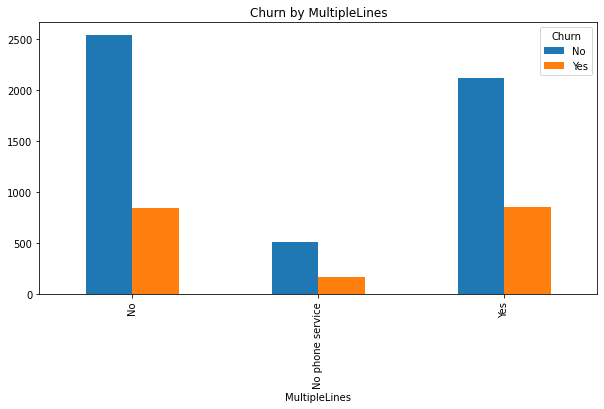

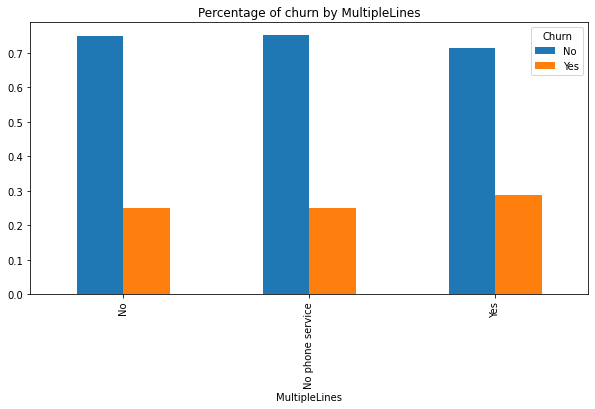

In [20]:
# churn by MultipleLines
mplines = df.groupby('MultipleLines')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("Churn by MultipleLines")
plt.show()
mplines_pct = df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("Percentage of churn by MultipleLines")
plt.show()

There does no appear to be a difference in behaviour between customers with only one line and those that have none as both of these groups have a churn rate of 25%. However, the set of customers having multiple lines have a churn rate of  29%.

#### Internet Service

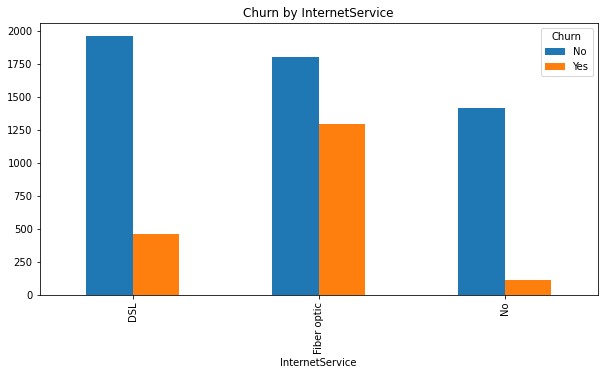

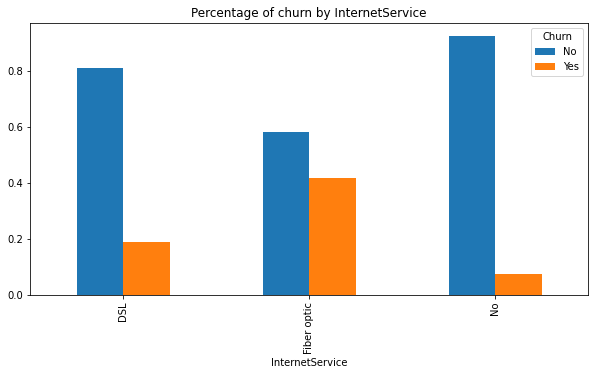

In [21]:
# churn by InternetService
internet = df.groupby('InternetService')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
internet.set_title("Churn by InternetService")
plt.show()
internet_pct = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
internet_pct.set_title("Percentage of churn by InternetService")
plt.show()

There are noticeable differences in churn between the three differnt groups. Customers with the fiber optic have the biggest churn rate with 41%, Digital Subscriber Line (DSL) customers' churn rate is 19% and finally customers who do not have internet have a churn rate of 7%.

#### Online Security

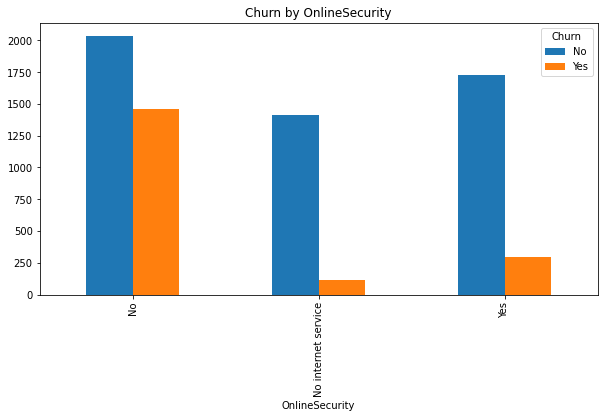

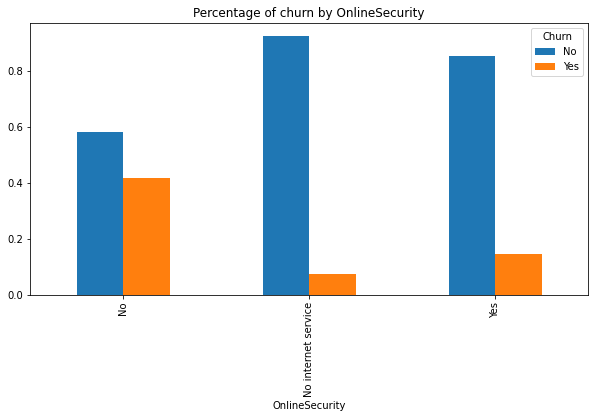

In [22]:
# churn by OnlineSecurity
security = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
security.set_title("Churn by OnlineSecurity")
plt.show()
security_pct = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
security_pct.set_title("Percentage of churn by OnlineSecurity")
plt.show()

As showed the previous graph the customers that do not have internet as part of their subscription have a 7% churn rate as it is the same group of customers. Although this group represents the samllest set of customers, they seem to be the most loyal.

Customers without online security as part of their subscription have a churn rate of 42% compared with 15% for those that have the security service included.

#### Online Backup

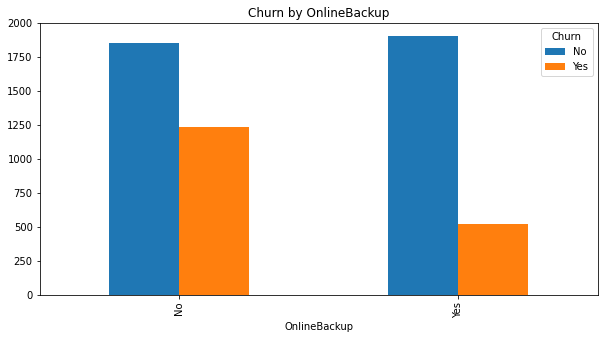

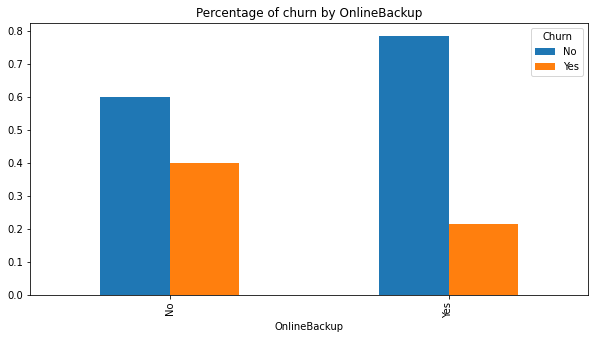

In [23]:
# churn by OnlineSecurity removing the customers without internet service to avoid duplicating results already presented
backup = df[df['OnlineBackup'] != 'No internet service'].groupby('OnlineBackup')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
backup.set_title("Churn by OnlineBackup")
plt.show()
backup_pct = df[df['OnlineBackup'] != 'No internet service'].groupby('OnlineBackup')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
backup_pct.set_title("Percentage of churn by OnlineBackup")
plt.show()

Customers without online backup represent 44% of the total customers while the ones with online backup represent 27% of the total customers (the rest being customers without internet service). The churn rate for customer without online backup is 40% compared with 22% for those that have an online backup which is 18 point percentage lower.

#### Device Protection

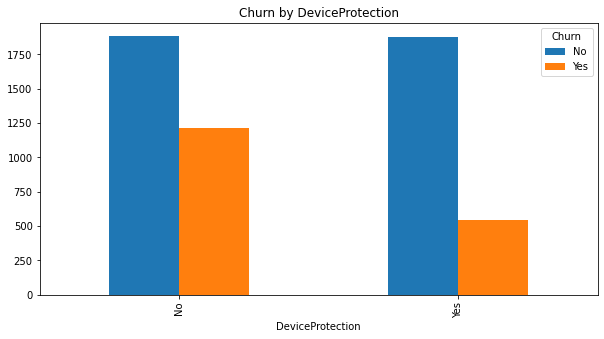

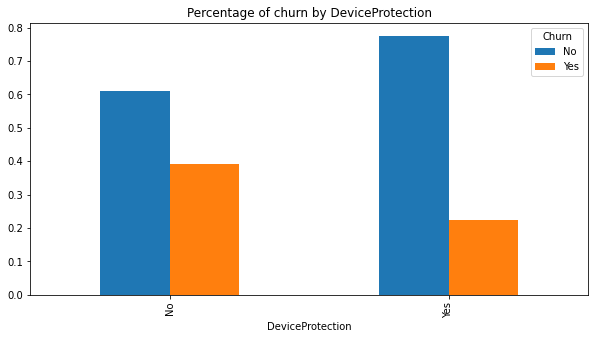

In [24]:
# churn by DeviceProtection removing the customers without internet service to avoid duplicating results already presented
prtct = df[df['DeviceProtection'] != 'No internet service'].groupby('DeviceProtection')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
prtct.set_title("Churn by DeviceProtection")
plt.show()
prtct_pct = df[df['DeviceProtection'] != 'No internet service'].groupby('DeviceProtection')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
prtct_pct.set_title("Percentage of churn by DeviceProtection")
plt.show()

Customers without a device protection represent 44% of the total customers while the ones with device protection represent 34% of the total customers (the rest being customers without internet service). The churn rate for customer without online backup is 39% compared with 23% for those that have an online backup which is 16 point percentage lower.

#### Tech Support

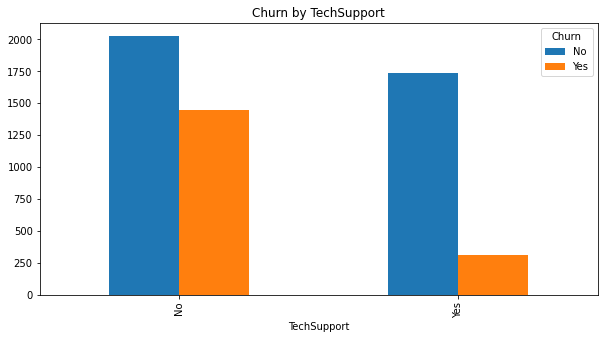

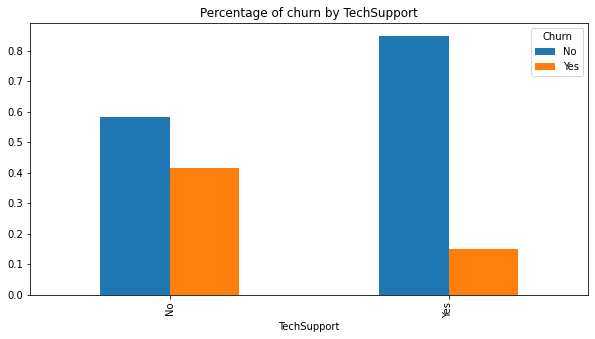

In [25]:
# churn by TechSupport removing the customers without internet service to avoid duplicating results already presented
support = df[df['TechSupport'] != 'No internet service'].groupby('TechSupport')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
support.set_title("Churn by TechSupport")
plt.show()
support_pct = df[df['TechSupport'] != 'No internet service'].groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
support_pct.set_title("Percentage of churn by TechSupport")
plt.show()

Customers without a tech support represent almost half (49%) of the total customers while the ones with tech support  represent 29% of the total customers (the rest being customers without internet service). The churn rate for customer without online backup is 41% compared with 15% for those that have an online backup which is 26 point percentage lower. There seems to be a significant difference in behaviour between customers with and without tech support.

#### Streaming TV

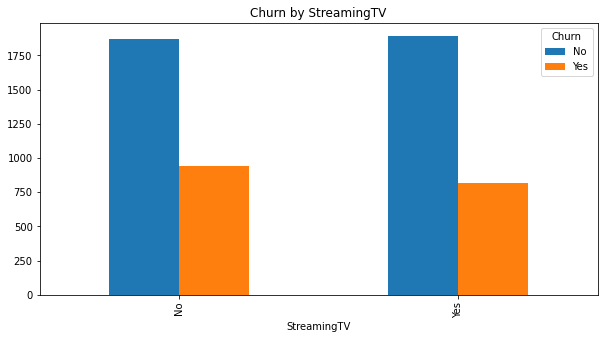

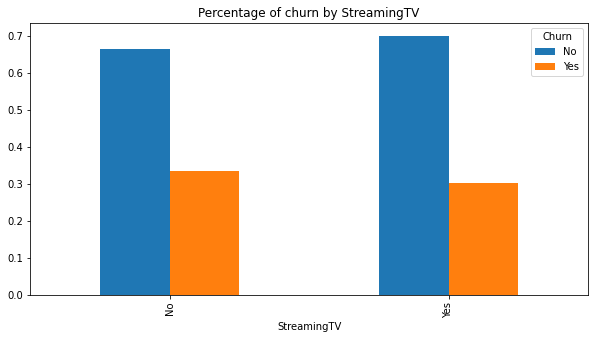

In [26]:
# churn by StreamingTV removing the customers without internet service to avoid duplicating results already presented
tv = df[df['StreamingTV'] != 'No internet service'].groupby('StreamingTV')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
tv.set_title("Churn by StreamingTV")
plt.show()
tv_pct = df[df['StreamingTV'] != 'No internet service'].groupby('StreamingTV')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
tv_pct.set_title("Percentage of churn by StreamingTV")
plt.show()

Customers without a tv streaming service represent 40% of the total customers while the ones with tv streaming service represent 38% of the total customers (the rest being customers without internet service). The churn rate for these two groups is 33% and 30% respectively.There does not seems to be a significant difference in behaviour between customers with and without tv streaming service.

#### Streaming Movies

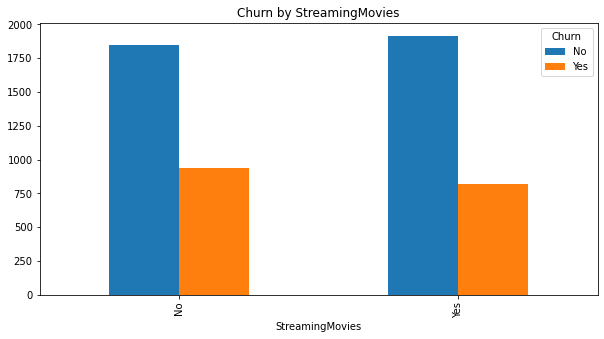

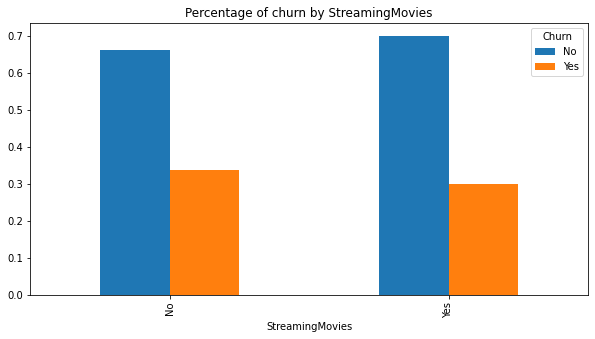

In [27]:
# churn by StreamingMovies removing the customers without internet service to avoid duplicating results already presented
movies = df[df['StreamingMovies'] != 'No internet service'].groupby('StreamingMovies')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
movies.set_title("Churn by StreamingMovies")
plt.show()
movies_pct = df[df['StreamingMovies'] != 'No internet service'].groupby('StreamingMovies')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
movies_pct.set_title("Percentage of churn by StreamingMovies")
plt.show()

Customers without a movies streaming service represent 40% of the total customers while the ones with movies streaming service represent 39% of the total customers (the rest being customers without internet service). The churn rate for these two groups is 33% and 30% respectively.There does not seems to be a significant difference in behaviour between customers with and without movies streaming service.

#### Contract

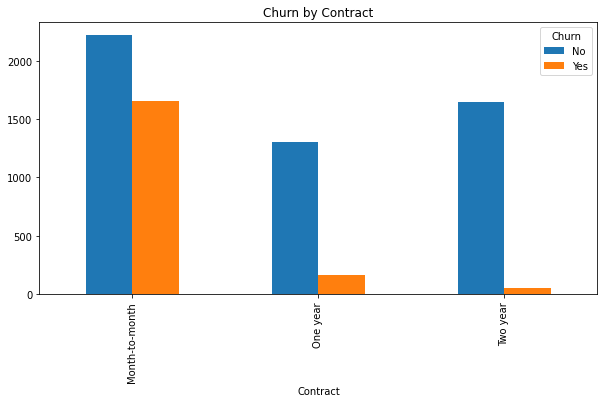

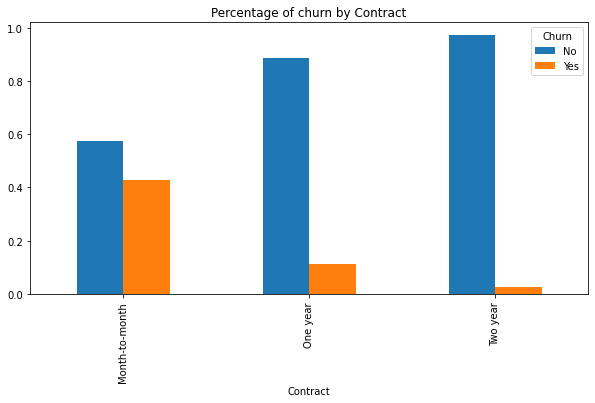

In [28]:
# churn by Contract
contract = df.groupby('Contract')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
contract.set_title("Churn by Contract")
plt.show()
contract_pct = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
contract_pct.set_title("Percentage of churn by Contract")
plt.show()

Customers with month-to-month rolling contracts represents the majority of the customers, 55%, one year contracts represent 21% of the dataset and two years contract represent 24% of the total customers. The longer the customers contract last for the less likely they are to churn. Thus, rolling contracts have the highest churn rate with 43% compared with 11% for the one year contract and only 3% for the two years contract. Therefore, there is a significant difference in behaviour between customers depending on the period they are locked in their contract.

#### Paperless Billing

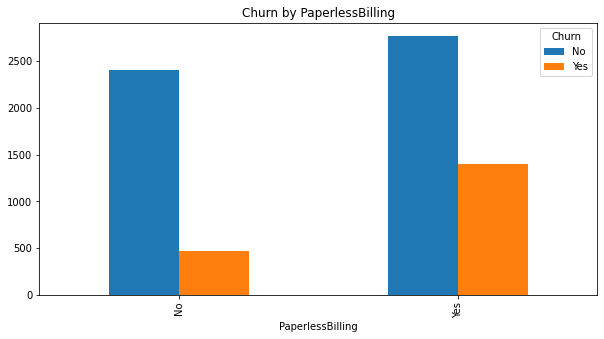

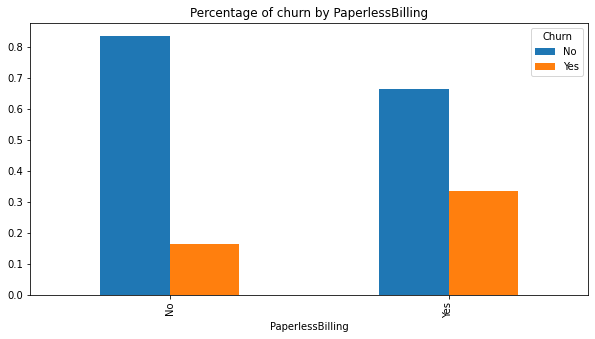

In [29]:
# churn by PaperlessBilling
bill = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
bill.set_title("Churn by PaperlessBilling")
plt.show()
bill_pct = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
bill_pct.set_title("Percentage of churn by PaperlessBilling")
plt.show()

Paperless billing represents 59% of the total customers billing system but has a greater churn rate with 34% compared with 16% for custumers that have paper bill. There is a significant difference in behaviour between customers that are paperless compared with paper billing.

#### Payment Method

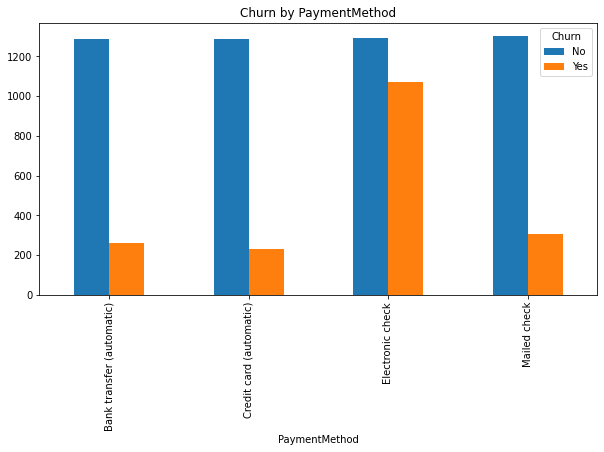

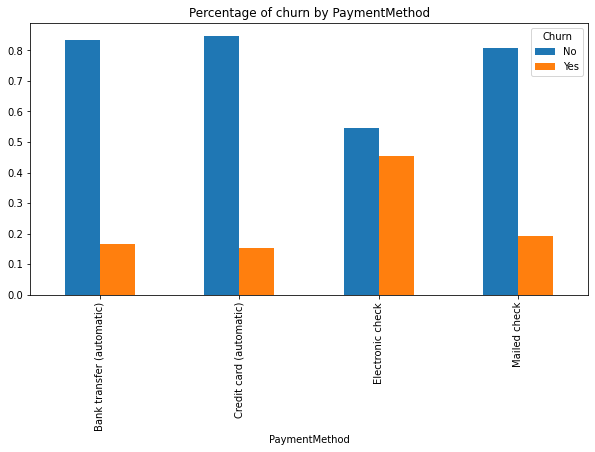

In [30]:
# churn by PaymentMethod
payment = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
payment.set_title("Churn by PaymentMethod")
plt.show()
payment_pct = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
payment_pct.set_title("Percentage of churn by PaymentMethod")
plt.show()

* Electronic check is the most common form of payments with 33% of the total customers using this method. However it is also the methode that has the highest churn with 45%
* Mailed check represents 23% of the total customers method of payments and has a churn rate of 19%
* Bank transfer (automatic) represents 22% of the total customers method of payments and has a churn rate of 17%
* Credit card (automatic) represents 22% of the total customers method of payments and has a churn rate of 15%

There is to be a difference in behaviour between customers depending the method of payment they prefer.

### 5.2 Numerical Data

#### Tenure

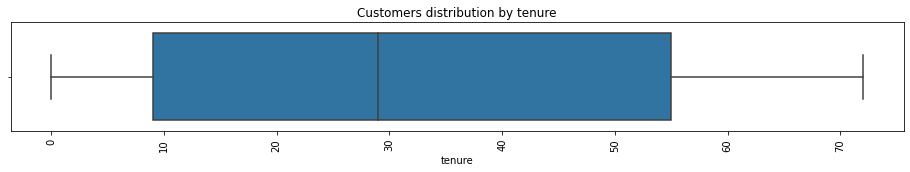

In [31]:
# Look at the distribution of the tenure feature
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.tenure)
dist_age.set_title("Customers distribution by tenure")
plt.show()

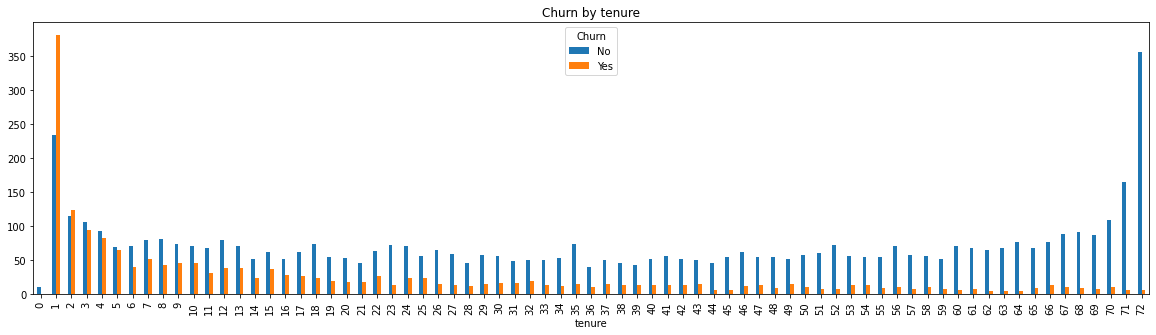

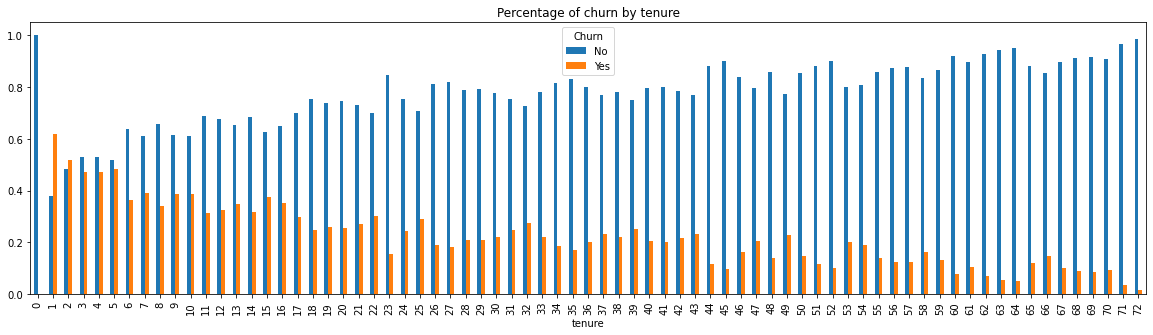

In [32]:
# churn by tenure
tenure = df.groupby('tenure')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(20,5))
tenure.set_title("Churn by tenure")
plt.show()
tenure_pct = df.groupby('tenure')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
tenure_pct.set_title("Percentage of churn by tenure")
plt.show()

Customers have on average a tenure of 32 months, most of the customers stay between 9 and 55 months. The first month of subscription seems to be the high risk month with over 50% of the churn. It seems that the longer the customer stay subscribe the less likely they are to leave in the future.

#### Monthly Charges

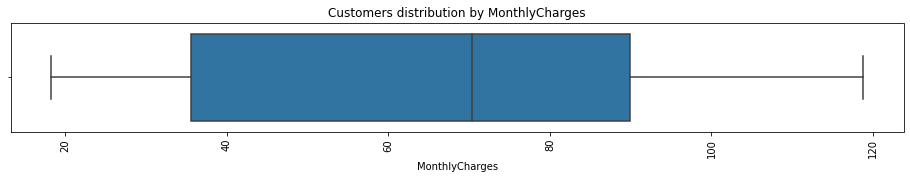

In [33]:
# Look at the distribution of the tenure MonthlyCharges
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
mth = sns.boxplot(x=df.MonthlyCharges)
mth.set_title("Customers distribution by MonthlyCharges")
plt.show()

The average monthly charge is £64.76, most of the customers are paying between £35.50 and £89.85 a month.

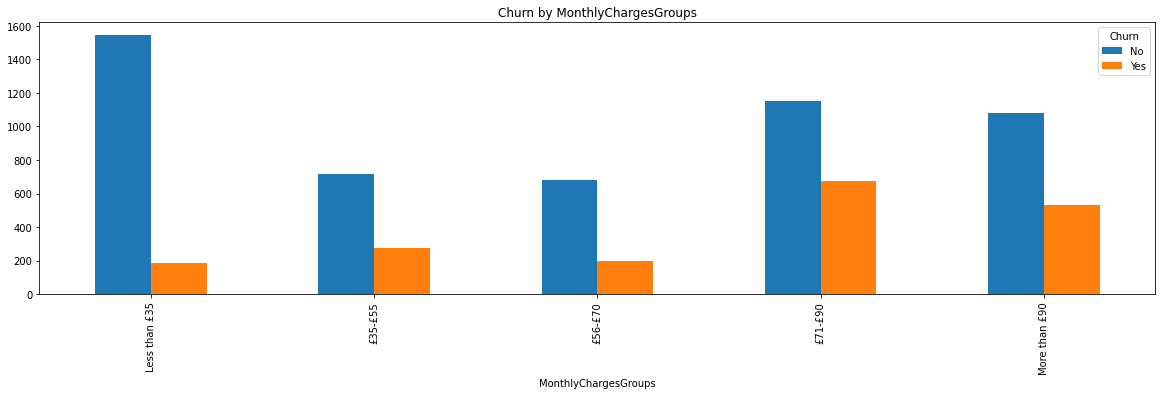

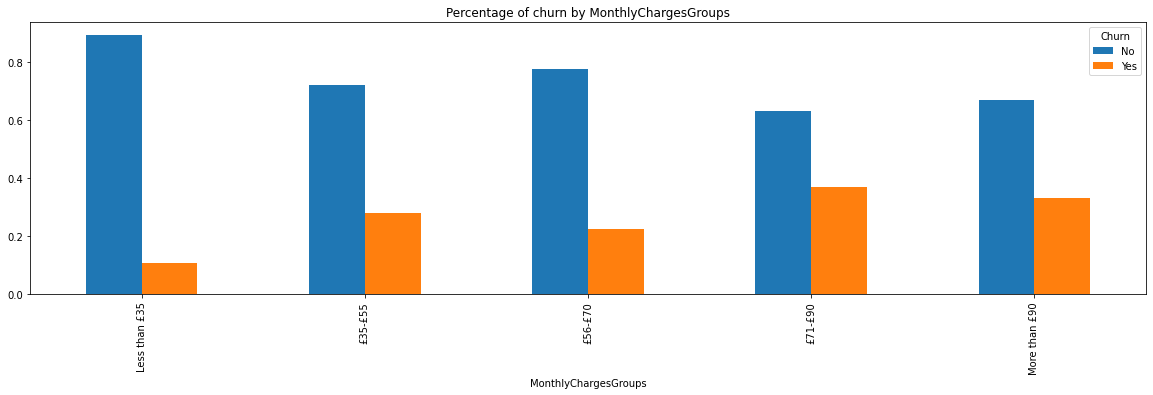

In [34]:
# create monthly charges groups
bins= [0,35,56,71,91,120]
labels = ['Less than £35', '£35-£55', '£56-£70', '£71-£90', 'More than £90']
df['MonthlyChargesGroups'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, right=False)

# churn by MonthlyChargesGroups
mthcharges = df.groupby('MonthlyChargesGroups')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(20,5))
mthcharges.set_title("Churn by MonthlyChargesGroups")
plt.show()
mthcharges_pct = df.groupby('MonthlyChargesGroups')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
mthcharges_pct.set_title("Percentage of churn by MonthlyChargesGroups")
plt.show()

* Less than £35 represents 25% of the total customers monthly payments and has a churn rate of 11%
* 14% of the customers pay monthly between £35 and £55, their churn rate is 28%
* 12% of the customers pay monthly between £56 and £70, their churn rate is 22%
* 26% of the customers pay monthly between £71 and £90, their churn rate is 37%
* 23% of the customers pay monthly more than £90, their churn rate is 33%

There seems to be a positive relationship between the churn rate and the monthly charges

#### Total Charges

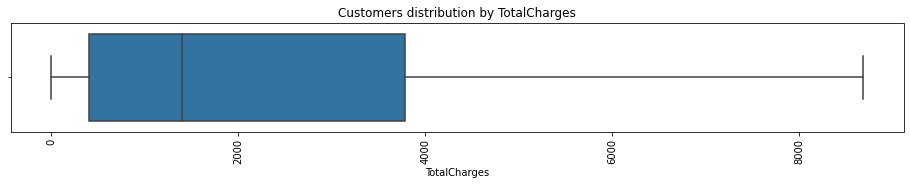

In [35]:
# Look at the distribution of the tenure TotalCharges
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
tot = sns.boxplot(x=df.TotalCharges)
tot.set_title("Customers distribution by TotalCharges")
plt.show()

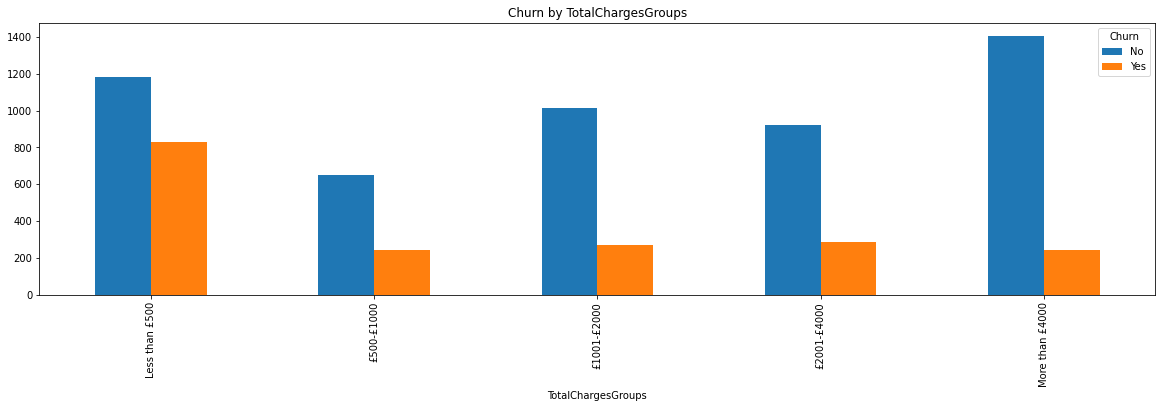

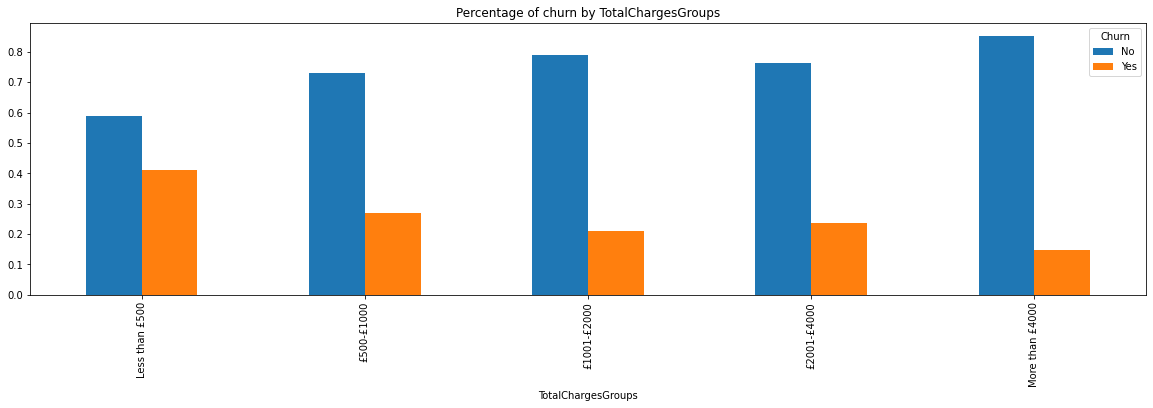

In [36]:
# create total monthly charges groups
bins= [0,500,1001,2001,4001,9000]
labels = ['Less than £500', '£500-£1000', '£1001-£2000', '£2001-£4000', 'More than £4000']
df['TotalChargesGroups'] = pd.cut(df['TotalCharges'], bins=bins, labels=labels, right=False)

# churn by TotalChargesGroups
mthcharges = df.groupby('TotalChargesGroups')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(20,5))
mthcharges.set_title("Churn by TotalChargesGroups")
plt.show()
mthcharges_pct = df.groupby('TotalChargesGroups')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
mthcharges_pct.set_title("Percentage of churn by TotalChargesGroups")
plt.show()

* 29% of the customers have their total charges under £500, their churn rate is 41%
* 13% of the customers have their total charges between £500 and £1000, their churn rate is 27%
* 18% of the customers have their total charges between £1001 and £2000, their churn rate is 21%
* 17% of the customers have their total charges between £2001 and £4000, their churn rate is 24%
* 23% of the customers have their total charges over £4000, their churn rate is 15%

There seems to be a positive relationship between the churn rate and the monthly charges

## 6. Creating a Model

### 6.1 Selecting the Prediction Target

This is the variable that we are trying to predict.

In [37]:
y = df.Churn

### 6.2 Feature Selection

These are the features that are going to be used in our model.

In [38]:
X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'MonthlyChargesGroups', 'TotalChargesGroups']]

### 6.3 Feature Engineering

We use label encoding to convert non numerical data into interger.

In [39]:
le = LabelEncoder()

X['gender'] = le.fit_transform(X['gender'])
X['Partner'] = le.fit_transform(X['Partner'])
X['Dependents'] = le.fit_transform(X['Dependents'])
X['PhoneService'] = le.fit_transform(X['PhoneService'])
X['MultipleLines'] = le.fit_transform(X['MultipleLines'])
X['InternetService'] = le.fit_transform(X['InternetService'])
X['OnlineSecurity'] = le.fit_transform(X['OnlineSecurity'])
X['OnlineBackup'] = le.fit_transform(X['OnlineBackup'])
X['DeviceProtection'] = le.fit_transform(X['DeviceProtection'])
X['TechSupport'] = le.fit_transform(X['TechSupport'])
X['StreamingTV'] = le.fit_transform(X['StreamingTV'])
X['StreamingMovies'] = le.fit_transform(X['StreamingMovies'])
X['Contract'] = le.fit_transform(X['Contract'])
X['PaperlessBilling'] = le.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = le.fit_transform(X['PaymentMethod'])
X['MonthlyChargesGroups'] = le.fit_transform(X['MonthlyChargesGroups'])
X['TotalChargesGroups'] = le.fit_transform(X['TotalChargesGroups'])
y = le.fit_transform(y)

### 6.4 Split the Data

In [40]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5282, 21) (5282,)
(1761, 21) (1761,)


### 6.5 Logistic Regression

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict no show
y_logreg_pred = logreg.predict(X_test)

# calculate the accuracy score
print('Accuracy of logistic regression classifier: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier: 0.80


#### Confusion Matrix

In [42]:
confusion_matrix = confusion_matrix(y_test, y_logreg_pred)
print(confusion_matrix)

[[1156  123]
 [ 222  260]]


Looking at the confusion matrix, we have 1,416 (1,156 + 260) correctly classified customers and 345 (123 + 222) incorrect predictions.

#### ROC Curve

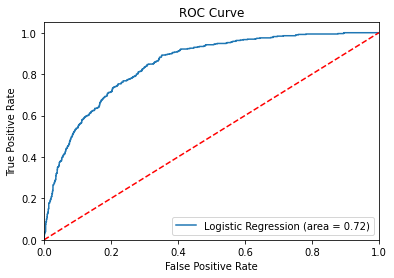

In [43]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The above graph shows that the logistic regression model stays far away for the ROC Curve, representing the random classifier. 

### 6.6 Random Forest

In [44]:
forest = RandomForestClassifier(max_depth=2, random_state=101)
forest.fit(X, y)

# predict no show
y_forest_pred = forest.predict(X_test)

# calculate the accuracy score
print('Accuracy of random forest classifier: {:.2f}'.format(forest.score(X_test, y_test)))

Accuracy of random forest classifier: 0.75


#### Feature Importance

This gives us the level of importance of each of our feature in predicting the medical appointment no-show.

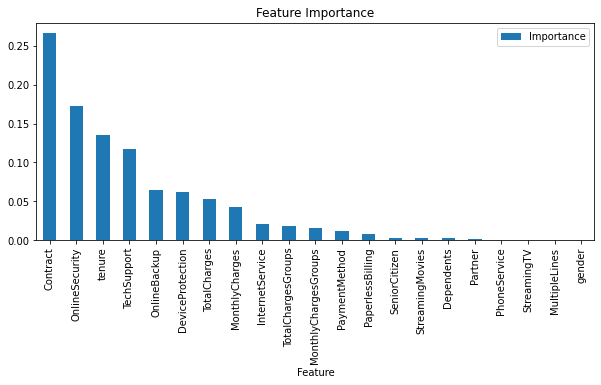

In [45]:
importances = pd.DataFrame({'Feature': X_train.columns,
                            'Importance': forest.feature_importances_}).set_index('Feature').sort_values('Importance',ascending=False)

# plot the importances
importances = importances.plot(kind='bar', figsize=(10,4))
importances = importances.set_title("Feature Importance")
plt.show()

The top four features in predicting the customers churn are the type of contract, the online security, the tenure and the tech support.

## 7 Conclusion

The logistic performs better in predicting the customer churn with 80% accuracy. The confusion matrix shows that 222 customers were predicted to stay members when they have in fact churned, this mean these customers would not be contacted to receive incentive in order to retain them. This figure is the one the telephone company should focus on bringing as close as possible to zero. 

We also have 123 customers classified as churning who they are not, this mean that the telephone company may spend money offering discounted price to customers that did not intend to leave.
